External Sources:
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

Use a decision tree classifier from the Scikit to classify this data using the colors as a predictor for the label via a 5-fold validation.

Import the libraries for scikit Deciion Tree, Support Vector Machine, and also truth tables from Scikit's libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

Import and read the data from the text files provided

In [ ]:
def read_data(name):
    X = np.genfromtxt(name+'_features.txt', delimiter=',')
    Y = np.genfromtxt(name+'_labels.txt')
    return X, Y

name = "RRLyrae"
X, Y = read_data(name)

In [ ]:
print(X,Y)

[[ 0.39400032  1.25099932  0.13700032  0.06199932]
 [ 0.33900132  1.04800032  0.15199932  0.02300132]
 [ 0.34199932  1.00800132  0.12900032  0.20300132]
 ...
 [ 0.21200032  1.04400132  0.03500032  0.00200132]
 [ 0.17200132  1.06499932  0.04200032  0.00300032]
 [ 0.06500132  1.12599932 -0.01700032 -0.05799932]] [0. 0. 0. ... 1. 1. 1.]


Create the five fold function, that way we can call it using differnt class weights and depths later on. The function created the tree classifier, does the validation, and find the accruayc, alongside creating a 2x2 truth table, and prints 2 of the four colors from the data set provided.

In [ ]:
def five_fold(class_weight=None, max_depth=None):
    #make the decisiontreclassifier with either balanced class weight or none, and if there is maximum depth
    tree_classifier = DecisionTreeClassifier(class_weight=class_weight, max_depth=max_depth)

    # use 5-fold cross-validation for the predictions
    y_pred = cross_val_predict(tree_classifier, X, Y, cv=5)

    #find the accuracy of this model
    scores = cross_val_score(tree_classifier, X, Y, cv=5)
    accuracy = scores.mean()*100

    #find and print the truth table
    conf_matrix = confusion_matrix(Y, y_pred)
    print(f"\nClass weight = {class_weight}, Max depth = {max_depth}: \n")
    print("The accuracy of the prediction: " +str(accuracy)+"% \n")
    print("           Predicted: No    Predicted: Yes")
    print("Actual: No  ", conf_matrix[0][0], "         ", conf_matrix[0][1])
    print("Actual: Yes ", conf_matrix[1][0], "            ", conf_matrix[1][1])


   # Plotting the data using only 2 colors
    x_color = X[:, 0]
    y_color = X[:, 1]

    plt.figure(figsize=(10, 8))
    plt.scatter(x_color[Y == 0], y_color[Y == 0], alpha=0.5, label='Non-RR Lyrae', color='blue')
    plt.scatter(x_color[Y == 1], y_color[Y == 1], alpha=0.5, label='RR Lyrae', color='red')

    plt.title('Diagram of Stars')
    plt.xlabel('Color 1')
    plt.ylabel('Color 2')
    plt.legend()

    plt.show()

In [ ]:
def main(class_weight=None, max_depth=None):
    five_fold(class_weight, max_depth)

Let's try a Deicions tree with class weight set to none, and a max depth of 3


Class weight = None, Max depth = 3: 

The accuracy of the prediction: 99.38373241790904% 

           Predicted: No    Predicted: Yes
Actual: No   92473           185
Actual: Yes  389              94


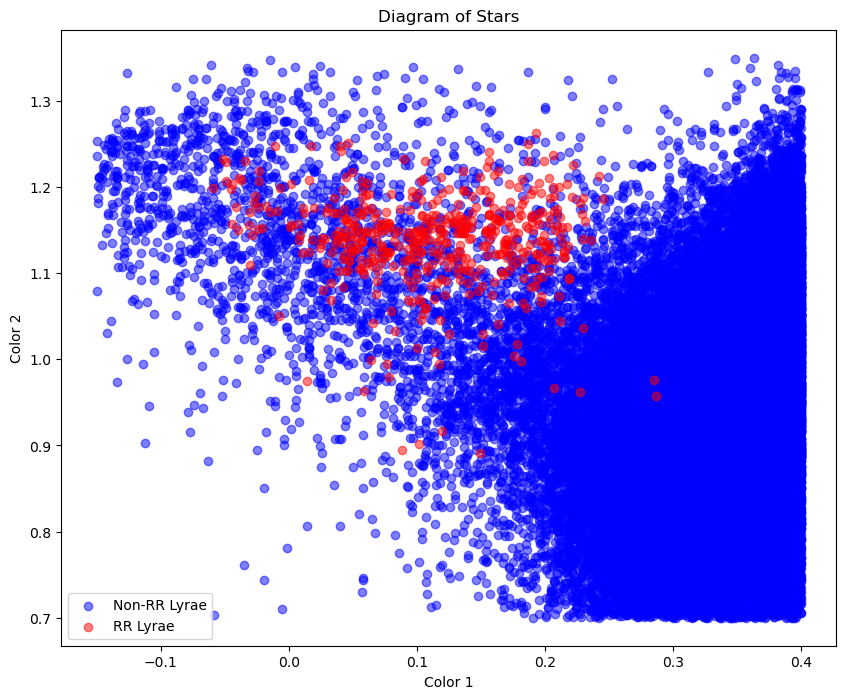

In [ ]:
main(None,3)

Switch the class weight to balanced to see how our accuracy and truth tables change


Class weight = balanced, Max depth = 3: 

The accuracy of the prediction: 97.09150695462787% 

           Predicted: No    Predicted: Yes
Actual: No   89959           2699
Actual: Yes  10              473


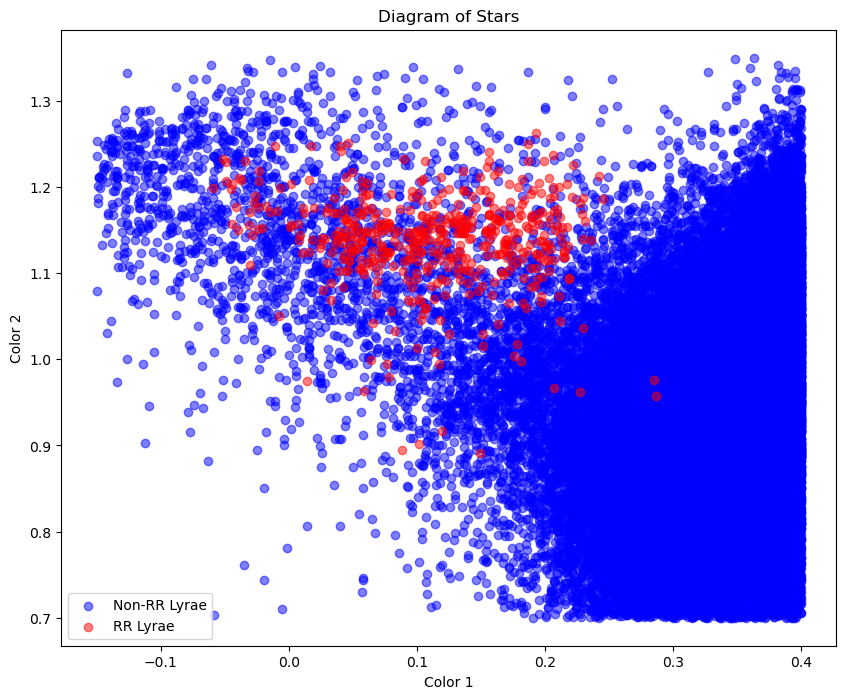

In [ ]:
main('balanced',3)

With the class weight set to balanced, our accuracy dropped, our True Negatives decreased, false positives increased significantly, but our true positives increased and our false negatives decreased.

Lets see how the model predicts with no depth limitations


Class weight = balanced, Max depth = None: 

The accuracy of the prediction: 99.51256784416269% 

           Predicted: No    Predicted: Yes
Actual: No   92461           197
Actual: Yes  240              243


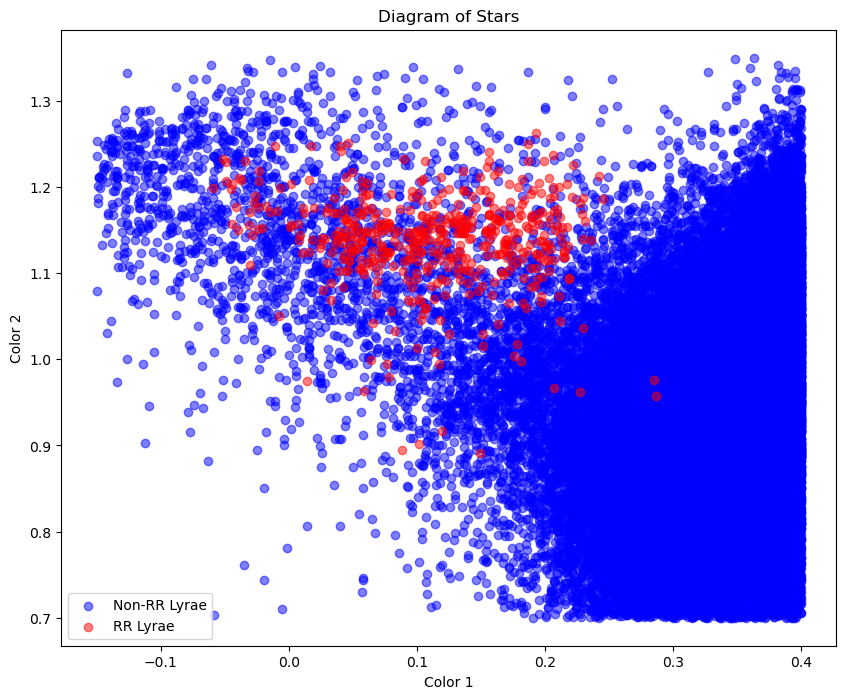

In [ ]:
main('balanced',None)

With the class weight set to balanced, but no depth limitations, our accuracy increased, our True Negatives increase, and t our true positives has a significant increase.

Lets see how the model predicts with no depth limitations and class weight set to none


Class weight = None, Max depth = None: 

The accuracy of the prediction: 99.47176927718718% 

           Predicted: No    Predicted: Yes
Actual: No   92390           268
Actual: Yes  236              247


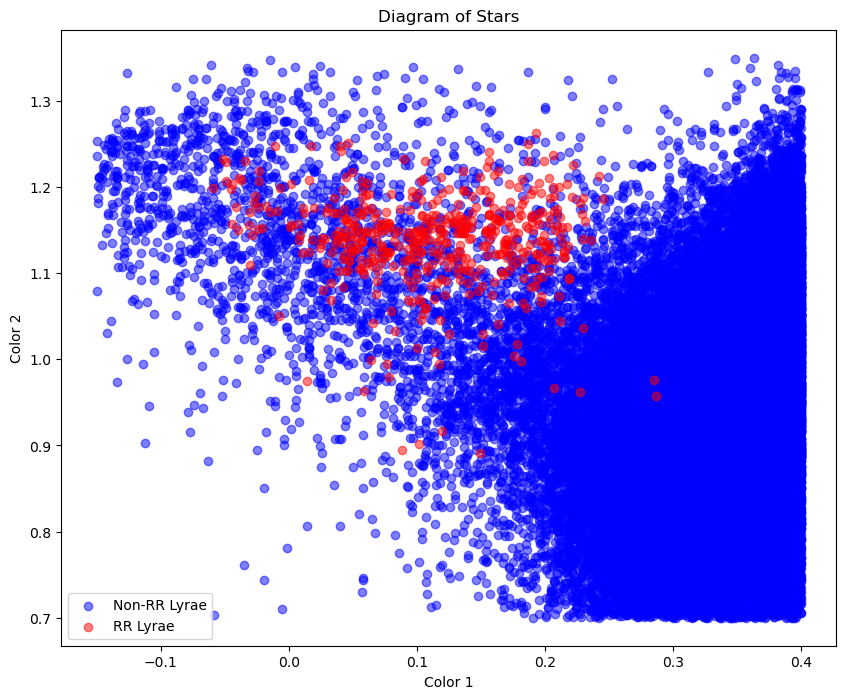

In [ ]:
main(None,None)

Using no class weights and no depth limits, this produced a good accuracy, but not better than using balanced class weights with no depth limitation. From these two parameters of Class weight and max depth of the tree, depth seems to a parameter that has t the most effect on the accuracy of the predictions.


Repeat 5 fold validation on the data, but instead of a Decision tree, use a Support Vector Machine classifier fom scikit's library. Here We will modify the Kernel Parameter to see how this affects the model's accuracy and the truth tables.

Create a singular SVM classifier function that we call via main to conduct the five fold validation, find and print the acuracy and truth tables for the different Kernel for SVM, such as a linear kernel, polynomial, or a Radial Basis Function kernel.

In [ ]:
# make one single func to do the SVM classifier
def svm_classifier(X, Y, kernel='linear', tol=0.01, C=1):
    #make the SVMclassiffier with balanced class weighh, and change the Kernel given the parameter
    svm = SVC(kernel=kernel, class_weight='balanced', probability=False)

    # use 5-fold cross-validation for the predictions
    y_pred = cross_val_predict(svm, X, Y, cv=5)

    #find the accuracy of this model
    accuracy_scores = cross_val_score(svm, X, Y, cv=5, scoring='accuracy')
    accuracy = np.mean(accuracy_scores) * 100  # Convert to percentage

    #find and print the truth table
    conf_matrix = confusion_matrix(Y, y_pred)
    print(f"\nAverage accuracy for SVM with kernel='{kernel}': {accuracy}\n")
    print("The accuracy of the prediction: " +str(accuracy)+"% \n")
    print("           Predicted: No    Predicted: Yes")
    print("Actual: No  ", conf_matrix[0][0], "         ", conf_matrix[0][1])
    print("Actual: Yes ", conf_matrix[1][0], "            ", conf_matrix[1][1])

In [ ]:
#set the kernel to linear by default
def main(kernel='linear'):
    print('running SvM')
    svm_classifier(X,Y,kernel)

Lets try the SVM with a linear kernel first

In [ ]:
main('linear')

running SvM

Average accuracy for SVM with kernel='linear': 96.52354935787002

The accuracy of the prediction: 96.52354935787002% 

           Predicted: No    Predicted: Yes
Actual: No   89425           3233
Actual: Yes  5              478


The accuracy with SVM is not a much as the Decision tree with balanced class weights, which was around 97%

Now, with a polynomial Kernel

In [ ]:
main('poly')

running SvM

Average accuracy for SVM with kernel='poly': 96.84564138150805

The accuracy of the prediction: 96.84564138150805% 

           Predicted: No    Predicted: Yes
Actual: No   89725           2933
Actual: Yes  5              478


While the accuracy did increase, the increase is very minor and the truth table and mostly the same

Finally, see the accuracy of a Radial Basis function kernel

In [ ]:
main('rbf')

running SvM

Average accuracy for SVM with kernel='rbf': 96.94548951404707

The accuracy of the prediction: 96.94548951404707% 

           Predicted: No    Predicted: Yes
Actual: No   89818           2840
Actual: Yes  5              478


The RBF kernel was the most accurate, and similair to the accuracy of the Decision tree's balacned class weight accuracy when limited to a depth of 3. Of the the three kernels, linear had the lowest accuracy, but is also not as computationally intensive as the other kernels.

In comparing SVM and Decisiontrees from the Scikit Library, SVM can prove to be a more useful tool given different levels of a tolerances, it also allows us to compensate noise using the C parameter of the SVM classifier, yet it shows to create a much larger compute time than Decision tree. This is because SVM algorithms must do quadratic optimization, which is more cpu intensive that a decision tree, which has the adavantage of being computed in parralle. Different branches of the tree can be run in parrelle, and can make use multi-core computation, or hyperthreading. Using linearSVM from the scikit library could reduce the runtime of using the linear kernel of support vector machines in the model, rather than just SVM.